##Tugas Pagerank

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
G = nx.Graph()

In [ ]:
G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(3,4),(4,5),(4,6),(5,6),(5,7),(5,8),(6,7),(6,8),(7,8),(7,9)])

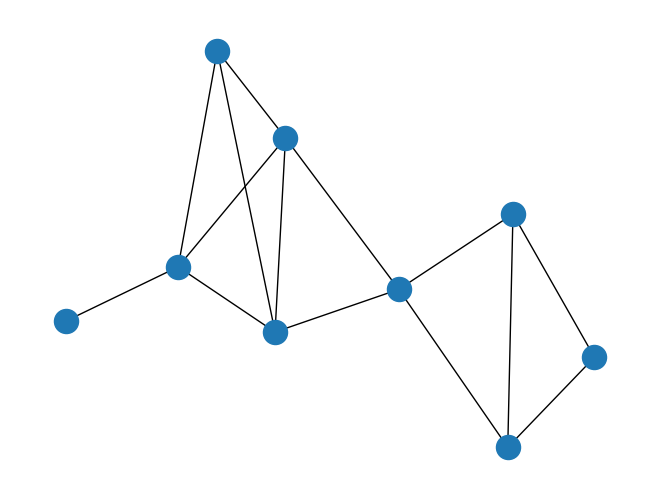

In [ ]:
nx.draw(G)

In [ ]:
Dc= nx.betweenness_centrality(G)
Dc

{1: 0.10714285714285714,
 2: 0.0,
 3: 0.10714285714285714,
 4: 0.5357142857142857,
 5: 0.21428571428571427,
 6: 0.21428571428571427,
 7: 0.25,
 8: 0.0,
 9: 0.0}

In [ ]:
sorted(Dc, key=Dc.get, reverse=True)

[4, 7, 5, 6, 1, 3, 2, 8, 9]